In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('data.csv').drop('Unnamed: 0', axis=1)

In [3]:
data.head()

,LotArea,GarageArea,MSZoning,LotFrontage,Condition1,HouseStyle,SalePrice,YearBuilt,YrSold,Neighborhood
0,5925,672,RM,50.0,Norm,1Story,89471,1937,2007,OldTown
1,9158,474,RL,76.0,Norm,1Story,225000,2007,2007,Somerst
2,12400,297,RL,66.0,Feedr,1Story,155000,1958,2009,NAmes
3,8520,720,RL,71.0,Artery,1.5Fin,166000,1952,2010,NAmes
4,17217,0,RL,90.0,Norm,1Story,84500,2006,2006,Mitchel


In [4]:
num_feats = [name for name, dtype in dict(data.dtypes).items() if dtype in ('int64', 'float64')]
num_feats

['LotArea', 'GarageArea', 'LotFrontage', 'SalePrice', 'YearBuilt', 'YrSold']

In [5]:
num_data = data[num_feats]

In [6]:
num_data_cliped = num_data.clip(num_data.quantile(0.01), num_data.quantile(0.99), axis=1)

## Найдем линено зависимы фичи

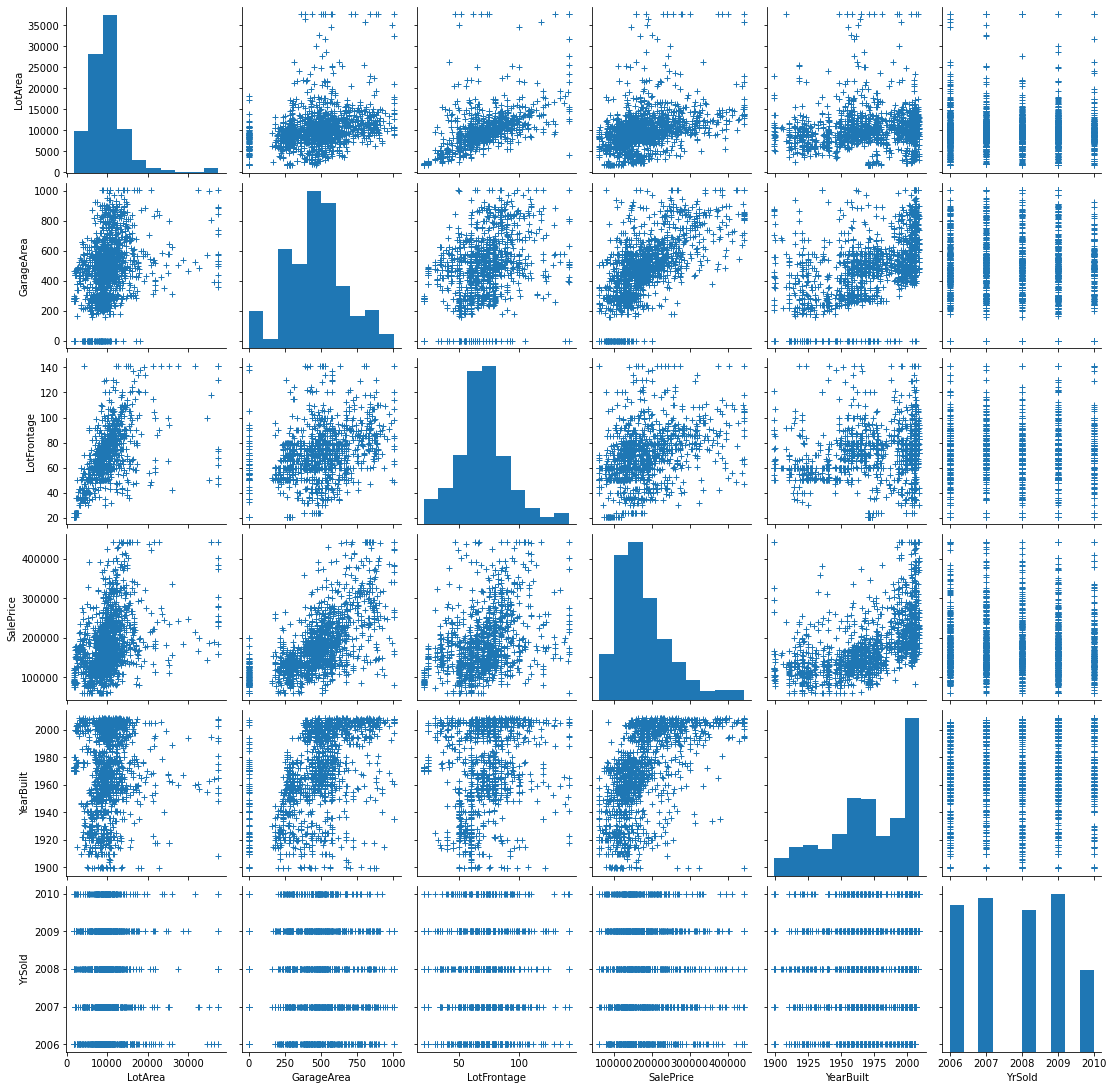

In [7]:
sns.pairplot(num_data_cliped, plot_kws=dict(marker="+", linewidth=1))

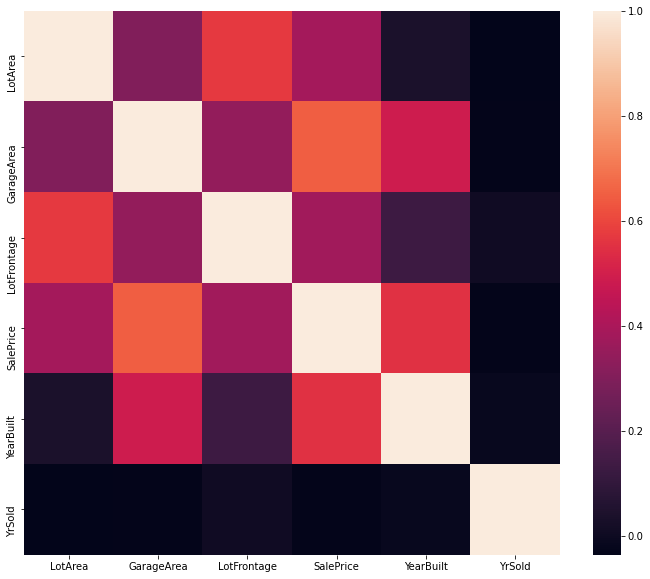

In [8]:
_, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(num_data_cliped.corr(), ax=ax)

## Обучим линейную регрессию по GarageArea предсказывать SalePrice

In [9]:
feat_1, feat_2 = 'GarageArea', 'SalePrice'
X, Y = data[[feat_1]].values, data[feat_2].values

In [10]:
lin = LinearRegression().fit(X, Y)
Y_pred = lin.predict(X)

Text(0, 0.5, 'SalePrice')

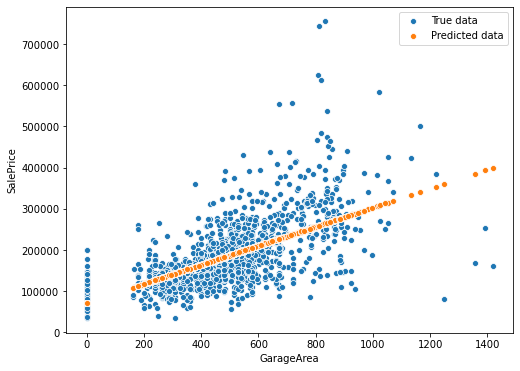

In [11]:
_, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(X[:, 0], Y, label='True data', ax=ax)
sns.scatterplot(X[:, 0], Y_pred, label='Predicted data', ax=ax)
ax.set_xlabel(feat_1)
ax.set_ylabel(feat_2)

In [12]:
print(f'Correlation coefficient = {np.corrcoef(Y, Y_pred)[0, 1]}') 

Correlation coefficient = 0.6234314389183617


In [13]:
print(f'Determinacy coefficient = {r2_score(Y, Y_pred)}') 

Determinacy coefficient = 0.3886667590318189


## Обучим линейную регрессию по GarageArea, YearBuilt, LotArea предсказывать SalePrice

In [14]:
X_feats, Y_feat = ['GarageArea', 'YearBuilt', 'LotArea'], 'SalePrice'
X, Y = data[X_feats].values, data[Y_feat].values

In [15]:
lin = LinearRegression().fit(X, Y)
Y_pred = lin.predict(X)

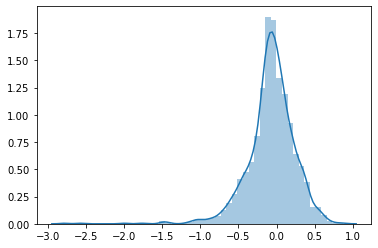

In [16]:
sns.distplot((Y - Y_pred) / Y)

In [17]:
print(f'Correlation coefficient = {np.corrcoef(Y, Y_pred)[0, 1]}') 

Correlation coefficient = 0.6963384086057233


In [18]:
print(f'Mean relative absolute error = {np.mean(np.abs(Y - Y_pred) / Y)}')

Mean relative absolute error = 0.22625932072144092


In [19]:
print(f'Determinacy coefficient = {r2_score(Y, Y_pred)}')

Determinacy coefficient = 0.48488717929955116
